# Purpose of Notebook
The goal of this code is to:
- Create models for predicting mass using a set of parameters:
    - Effective Temperature
    - Log g
    - Iron Abundance [Fe/H]
    - Alpha Abundance [alpha/Fe]
    - Nitrogen Abundance [N/Fe]
    - Oxygen Abundance [O/Fe]
- The model will be created using two datasets

- Use K2 model to predict the mass for GALAH


A good question is: why do all of this?
- Although the datasets used have their own mass prediction model, they are for general purposes
- Since we are interested specifically in low mass stars up to 2.5 solar masses, we want more specific prediction of the stars masses
- After using the model, we should also compare the distribution predicted by both models to see if the different models predict similar distribution of masses

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# K2 Model

In [29]:
mass_prediction_k2 = pd.read_csv("ProcessedData/cleaned_k2.csv")

In [30]:
mass_prediction_k2

,EPIC,kappa-m-c,tmass_id,sobject_id,gaiadr3_source_id,ra,dec,flag_sp,chi2_sp,model_name,...,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib5797,sigma_dib5797,rv_dib5797,ew_dib6613,sigma_dib6613,rv_dib6613,mass
0,210338347,1.464,03552199+1153369,160109002001118,36770937305228032,58.841625,11.893583,0,0.901462,b'4750_2.00_-0.50',...,0.260102,0.843183,-10.689837,0.064369,0.381781,-29.708410,0.069195,0.335458,-6.634755,1.092844
1,210349156,1.815,03534985+1211549,151110003701190,36841924524592128,58.457706,12.198611,0,1.047793,b'4750_2.50_0.00',...,0.181036,0.918487,43.105785,0.069973,0.670325,15.724678,0.040888,0.299672,48.644352,1.338820
2,210352451,1.545,03551092+1217213,160109002001223,38302896302859776,58.795540,12.289278,0,1.029681,b'4750_3.00_0.00',...,0.199201,0.936750,-11.260378,0.059218,0.362096,-39.275707,0.050964,0.463754,-15.328494,1.175593
3,210354399,2.022,03533889+1220365,151110003701205,36852777904768384,58.412125,12.343472,0,0.966639,b'4500_2.00_0.00',...,0.203011,0.999752,57.970570,0.061306,0.213619,52.812390,0.053367,0.294525,71.317500,1.454938
4,210365611,1.656,03551179+1238117,151110003701277,38365813278903168,58.799168,12.636611,0,1.007371,b'4500_2.50_0.00',...,0.205928,0.943600,25.137930,0.036154,0.154188,-8.065115,-0.041152,0.502284,42.394573,1.190007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,248062122,1.662,04450672+2616471,170127001601383,148314772738400512,71.278038,26.279751,0,0.885755,b'4750_2.00_-0.50',...,0.277230,1.104694,51.180550,-0.076777,0.324829,43.911167,-0.128312,0.336749,61.070377,1.196130
323,248075236,1.413,04433443+2623011,170127001601352,148327318338432256,70.893501,26.383694,0,0.831457,b'5000_3.00_-0.50',...,0.202883,1.126538,81.940250,-0.103720,0.317693,68.764000,-0.007863,0.098643,7.709849,1.116102
324,248095314,2.228,04413875+2632381,170127001601264,148535263475584512,70.411499,26.543917,0,0.934626,b'4500_2.00_-0.25',...,0.237821,1.223675,60.534985,-0.070386,0.244205,50.768234,0.117147,0.353773,63.977264,1.529459
325,248100939,1.275,04433475+2635256,170127001601334,148525367870877824,70.894791,26.590500,0,1.291657,b'4750_2.50_0.00',...,0.217997,1.074829,64.467674,-0.077106,0.232650,47.289577,0.128313,0.382951,65.287200,0.914772


In [58]:
mass_prediction_k2.mass.describe()

count    314.000000
mean       1.176233
std        0.249177
min        0.619151
25%        1.024120
50%        1.155246
75%        1.295440
max        2.304767
Name: mass, dtype: float64

(array([ 9., 42., 85., 98., 47., 19.,  8.,  2.,  1.,  3.]),
 array([0.61915135, 0.78771291, 0.95627448, 1.12483605, 1.29339762,
        1.46195918, 1.63052075, 1.79908232, 1.96764389, 2.13620545,
        2.30476702]),
 <BarContainer object of 10 artists>)

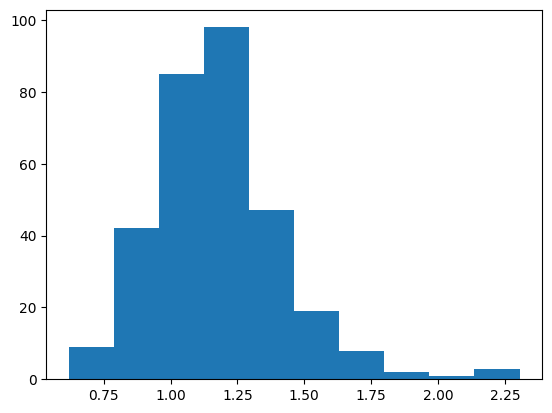

In [60]:
plt.hist(mass_prediction_k2.mass)

In [36]:
# The parameters we will be using to create the model
features = ["teff", "logg", "fe_h", "red_alpha_fe", "c_fe", "n_fe", "o_fe"]
mass_prediction_k2 = mass_prediction_k2[features + ["mass"]]
mass_prediction_k2 = mass_prediction_k2.dropna()

In [37]:
# X = data Y = mass
X = mass_prediction_k2[features]
y = mass_prediction_k2["mass"]

In [113]:
# Using 80% of the data to train the model and use 20% to verify it
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Random Forest Regression
Initial parameters to create the model:
- `n_estimator = 200`
- `train_size = 0.8`
    - 80% of the data is used to train while 20% of the data is used to test the accuracy of the model

In [119]:
# Create the model
seed = 0 # Make sure results are replicable
k2_model_RFR = RandomForestRegressor(n_estimators=500, random_state=seed)
k2_model_RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [120]:
y_pred_RFR = k2_model_RFR.predict(X_test)
# Determine whether the model
score_RFR = np.sqrt(mean_absolute_error(y_pred_RFR, y_test))
corr_RFR = np.corrcoef(y_test, y_pred_RFR)[0][1]

In [121]:
score_RFR

0.41341951947749506

In [122]:
corr_RFR

0.27002045715635103

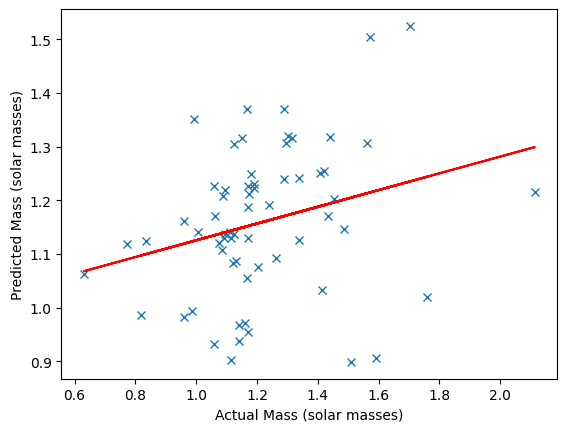

In [123]:
plt.plot(y_test, y_pred_RFR, 'x')
plt.xlabel("Actual Mass (solar masses)")
plt.ylabel("Predicted Mass (solar masses)")

theta = np.polyfit(y_test, y_pred_RFR, 1)
least_square_regression_line = theta[1] + theta[0] * y_test
plt.plot(y_test, least_square_regression_line, "r-")

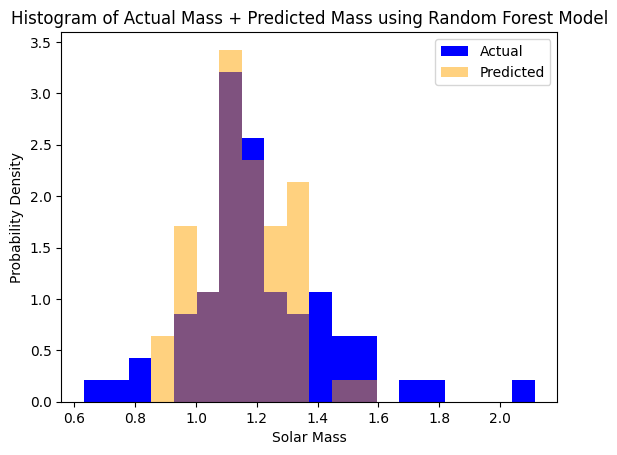

In [124]:
_, mass_bins = np.histogram(y_test, bins = 20)
plt.hist(y_test, density=True, color="blue", bins=mass_bins)
plt.hist(y_pred_RFR, density=True, color="orange", alpha=0.5, bins=mass_bins)
plt.ylabel("Probability Density")
plt.xlabel("Solar Mass")
plt.title("Histogram of Actual Mass + Predicted Mass using Random Forest Model")
plt.legend(("Actual", "Predicted" ), loc="upper right")

This method is better than polynomial regression but still not great.
Specifically this method at least peaks in the right place but this will likely lead to an overestimation of mass around the 1.2 solar mass range.
- [Put this in analysis](https://towardsdatascience.com/a-limitation-of-random-forest-regression-db8ed7419e9f)

## Polynomial Regression

In [88]:
# Create the model
poly = PolynomialFeatures(degree=7, include_bias=False)
poly_features_train = poly.fit_transform(X_train[features])
k2_model_PR = LinearRegression()
# Train the model
k2_model_PR.fit(poly_features_train, y_train)
# Test the model
poly_features_test = poly.fit_transform(X_test[features])
y_pred_PR = k2_model_PR.predict(poly_features_test)
score_PR = np.sqrt(mean_absolute_error(y_pred_PR, y_test))
corr_PR = np.corrcoef(y_test, y_pred_PR)[0][1]

In [89]:
score_PR

0.5129704922943646

In [90]:
corr_PR

0.2947112024818571

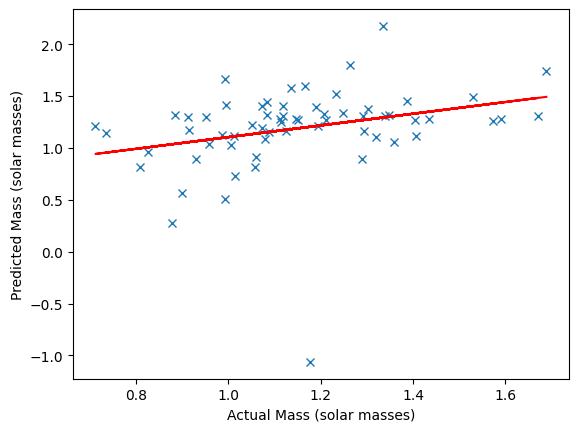

In [91]:
plt.plot(y_test, y_pred_PR, 'x')
plt.xlabel("Actual Mass (solar masses)")
plt.ylabel("Predicted Mass (solar masses)")

theta = np.polyfit(y_test, y_pred_PR, 1)
least_square_regression_line = theta[1] + theta[0] * y_test
plt.plot(y_test, least_square_regression_line, "r-")

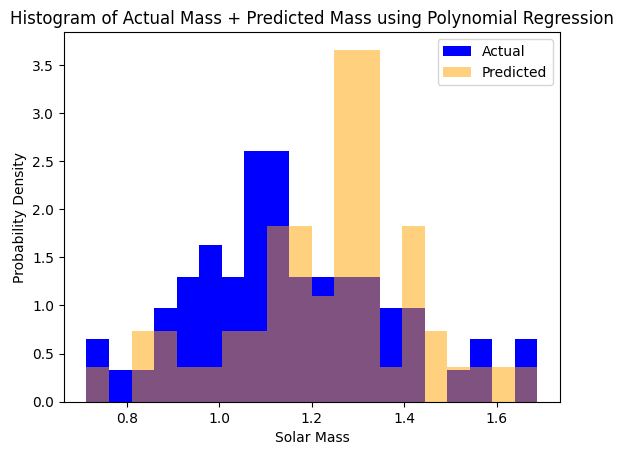

In [92]:
_, mass_bins = np.histogram(y_test, bins = 20)
plt.hist(y_test, density=True, color="blue", bins=mass_bins)
plt.hist(y_pred_PR, density=True, color="orange", alpha=0.5, bins=mass_bins)
plt.ylabel("Probability Density")
plt.xlabel("Solar Mass")
plt.title("Histogram of Actual Mass + Predicted Mass using Polynomial Regression")
plt.legend(("Actual", "Predicted" ), loc="upper right")

# Mass for Deep Mixing Predictions

In [144]:
galah = pd.read_csv("ProcessedData/cleaned_galah.csv")

In [138]:
galah = galah[features + ["ra", "dec", "li_fe"]]
galah = galah.dropna()
params = galah[features]
mass_galah = k2_model_RFR.predict(params)
galah["mass"] = mass_galah

In [143]:
galah.to_csv("ProcessedData/galah_with_mass.csv", index=False)

## Analysis of mass prediction

Text(0.5, 0, 'Mass in solar masses')

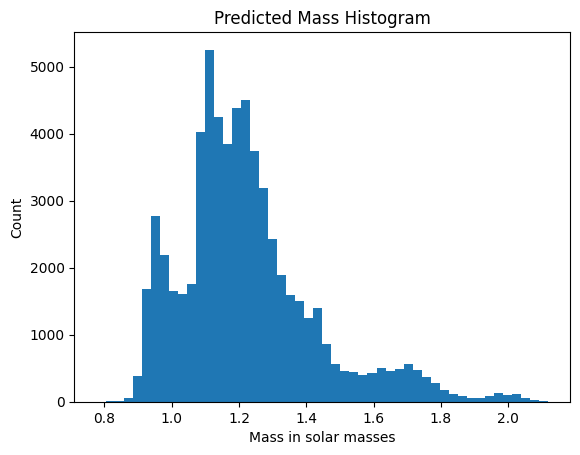

In [140]:
plt.hist(
    galah.mass,
    bins=50
)

plt.title("Predicted Mass Histogram")
plt.ylabel("Count")
plt.xlabel("Mass in solar masses")

{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff251294970>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff251294850>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff2512a6070>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff2512a6430>}

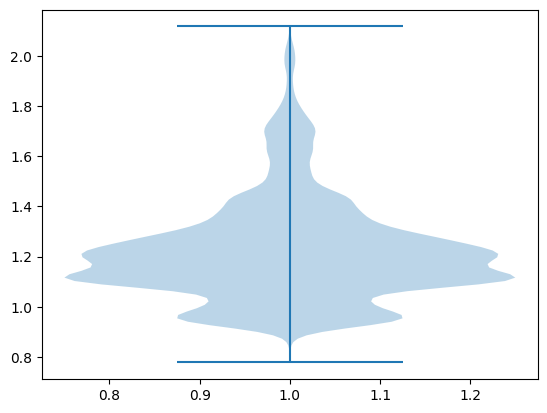

In [142]:
plt.violinplot(galah.mass)